In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import imblearn
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../input/bank-marketing-data-set/bank-direct-marketing-campaigns.csv')

About Dataset

Relevant Information:

The data is related wit direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.


Number of Instances: 45211

Number of Attributes: 16 + output attribute.

Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a 
previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

# I.FEATURE ENGINEERING:

## I.1. EDA:

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [5]:
df.shape

(41188, 20)

In [6]:
y=df['y']
df.drop(['y'],axis=1,inplace=True)

In [7]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
df.select_dtypes(np.object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [9]:
cat_df=df[df.select_dtypes(np.object).columns]
num_df=df.drop(df.select_dtypes(np.object).columns,axis=1)

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

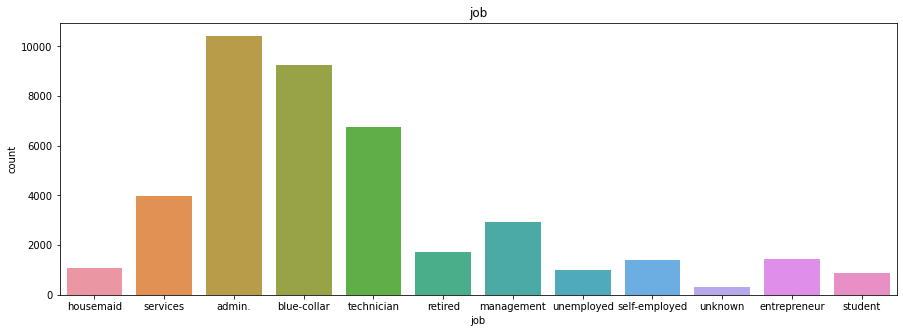

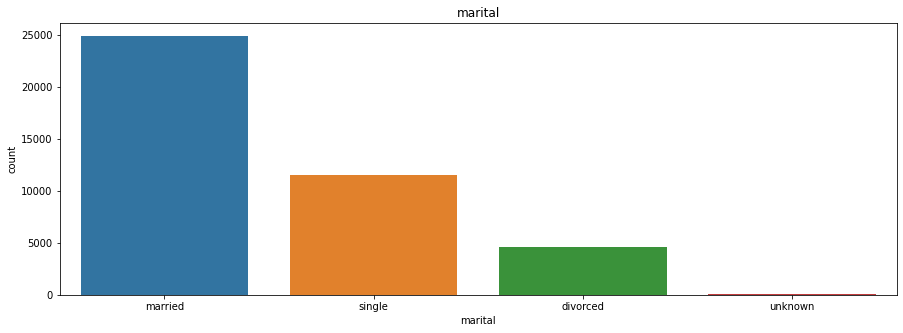

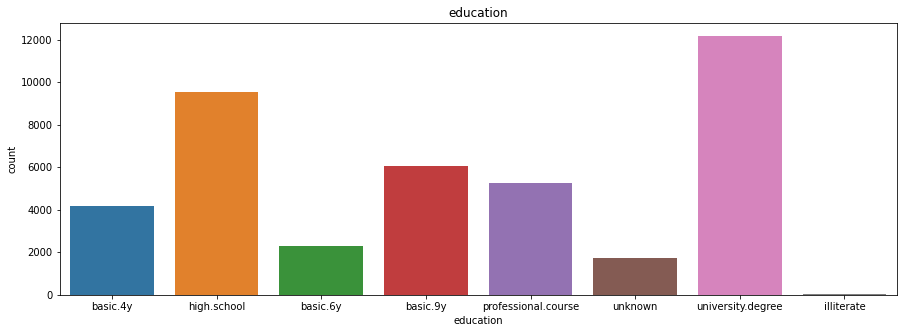

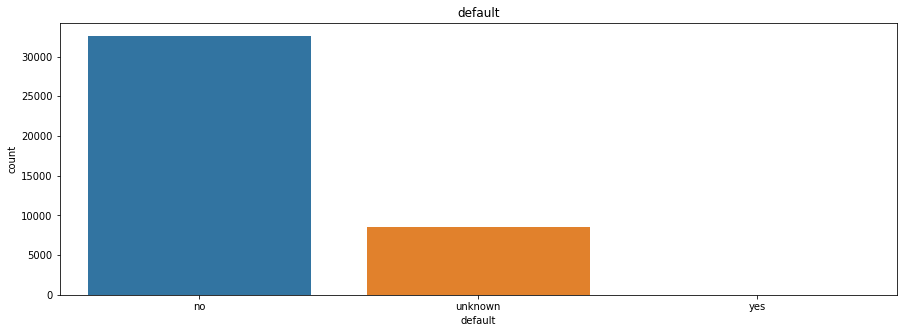

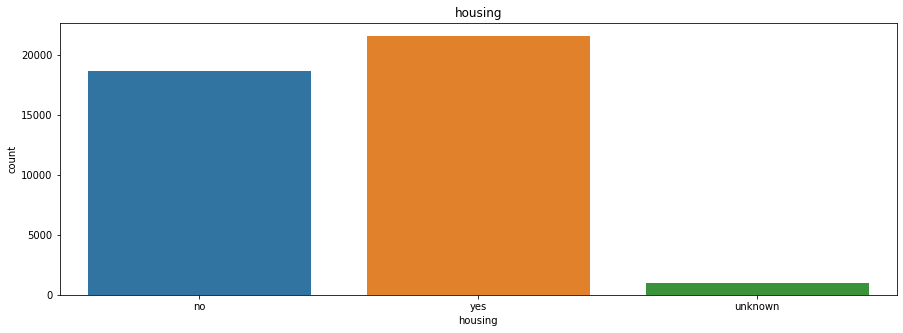

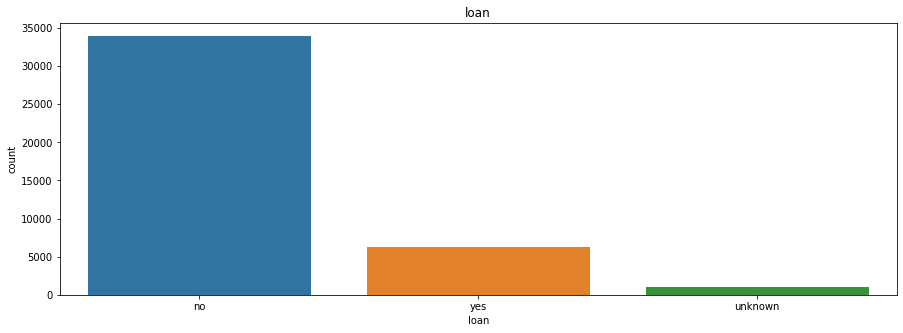

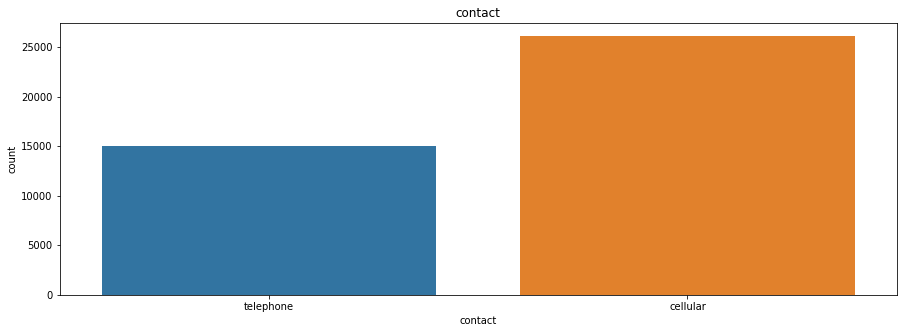

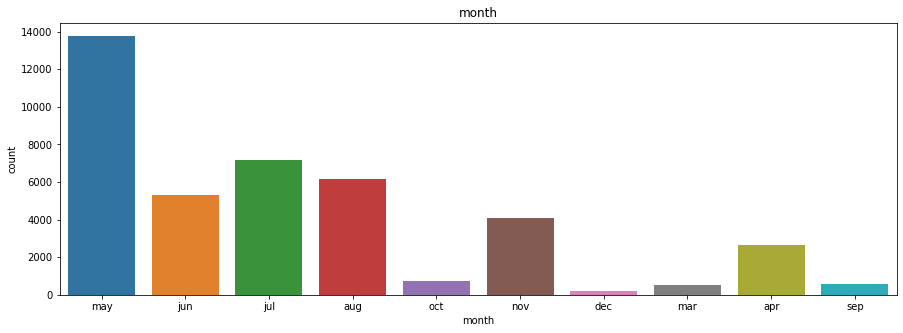

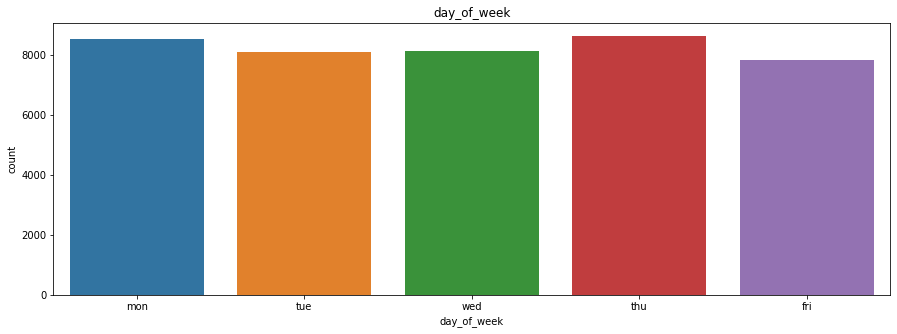

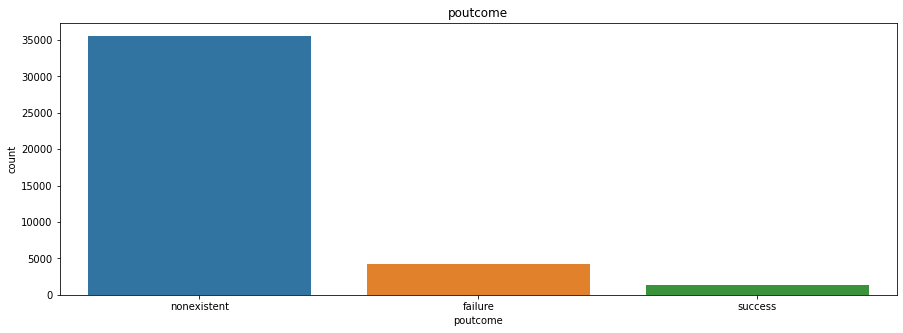

In [11]:
for col in cat_df.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(cat_df[col])
    plt.title(col)

In [12]:
num_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [13]:
num_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


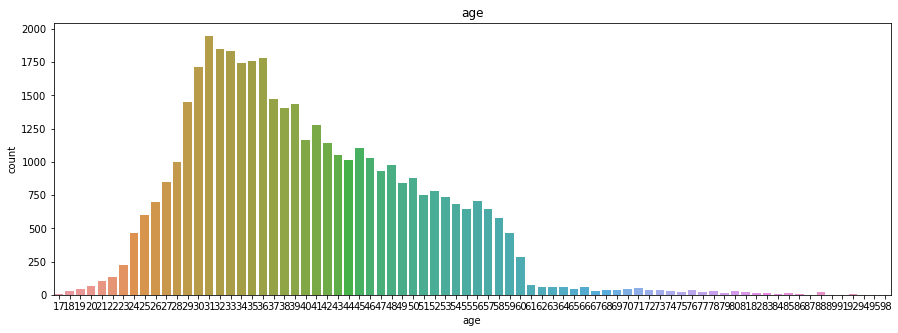

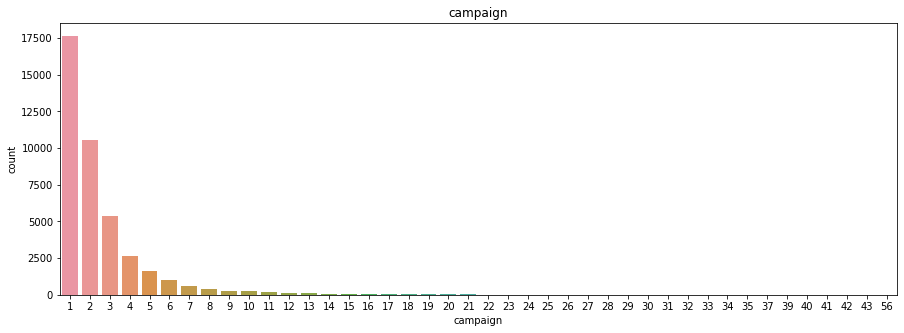

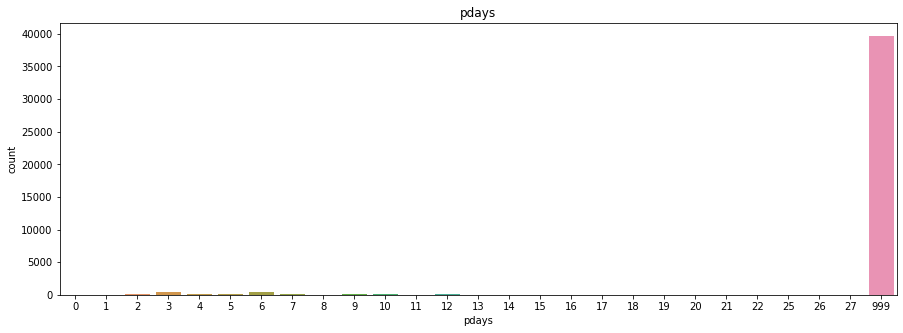

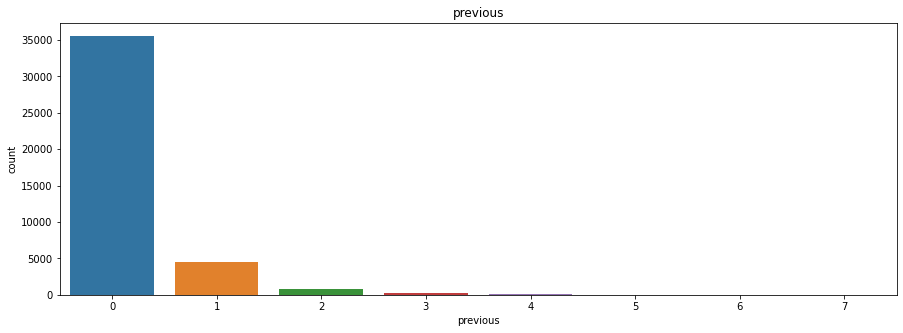

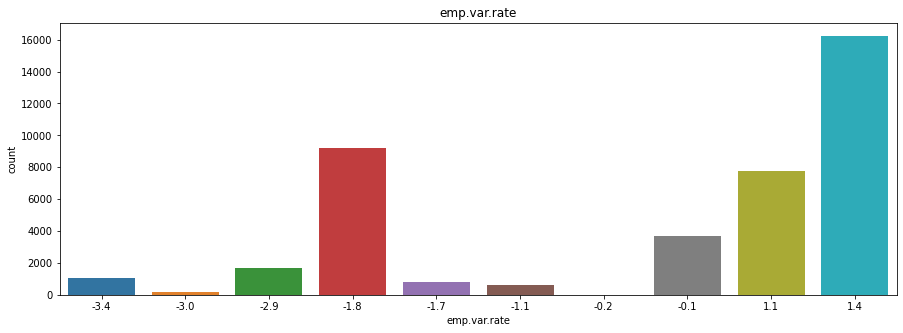

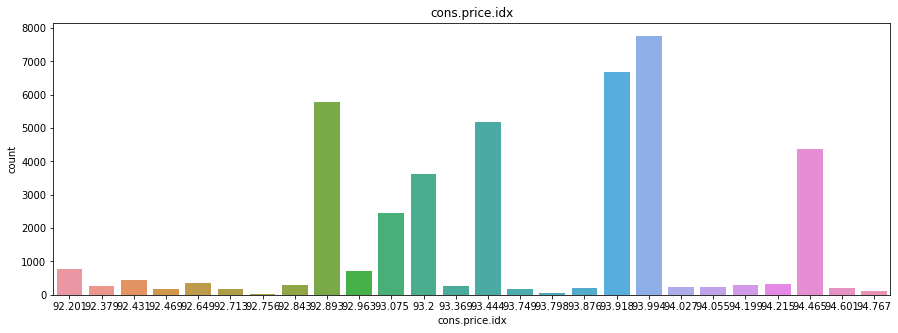

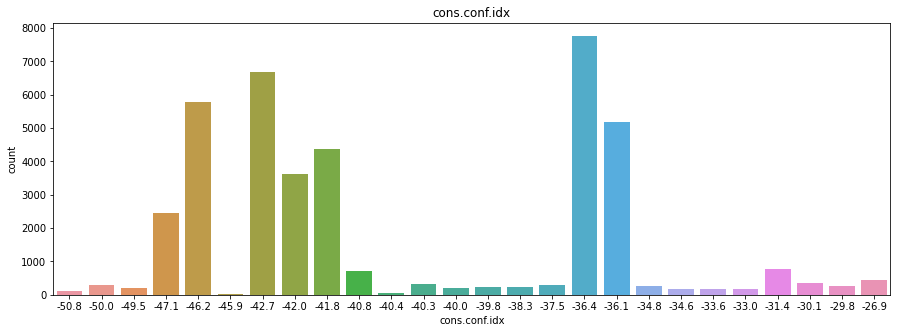

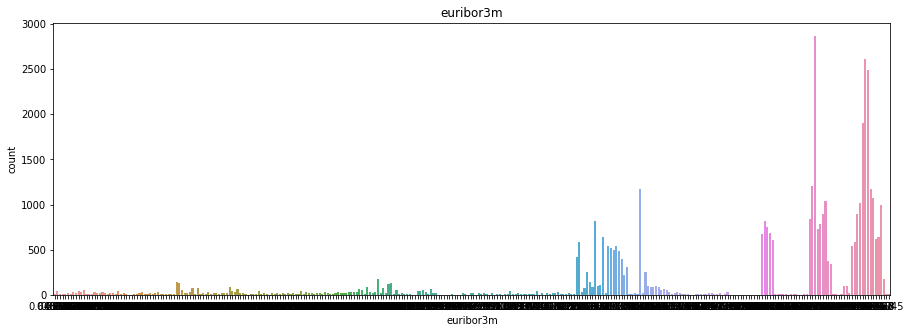

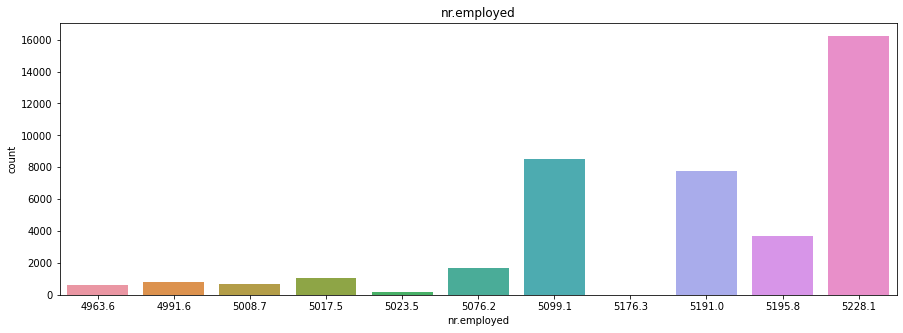

In [14]:
for col in num_df.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(x=num_df[col])
    plt.title(col)

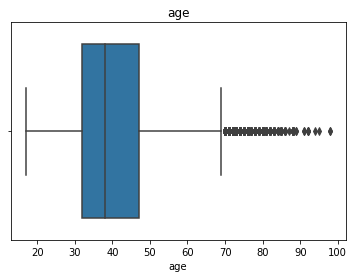

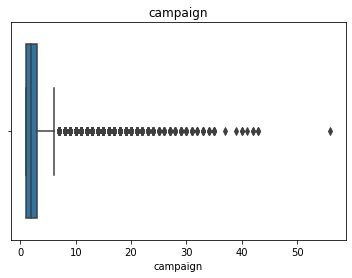

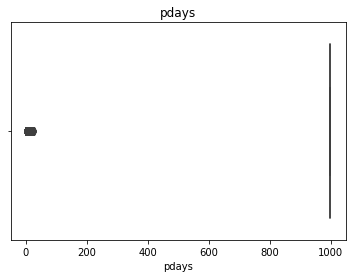

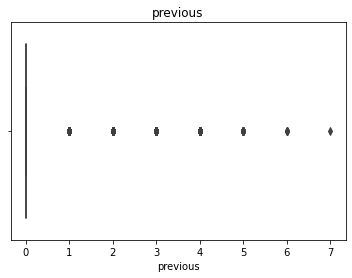

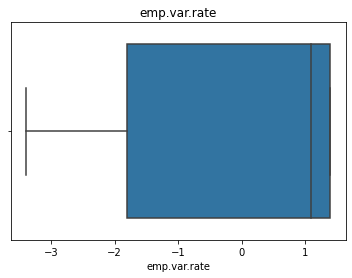

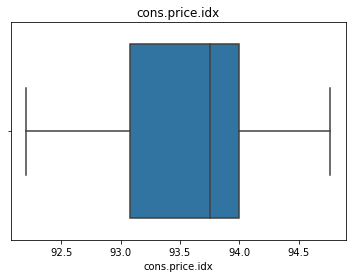

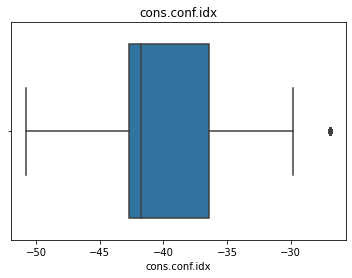

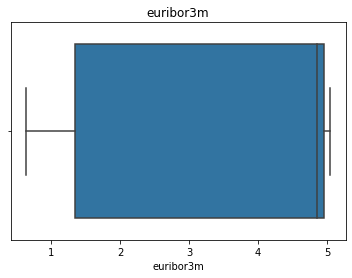

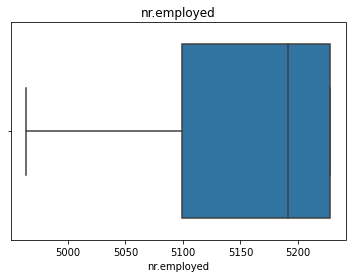

In [15]:
for col in num_df.columns:
    plt.figure()
    sns.boxplot(x=num_df[col])
    plt.title(col)


# I.2.Handling the missing values:

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['marital']=si.fit_transform(np.array(cat_df['marital']).reshape(-1,1))
cat_df['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [18]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['education']=si.fit_transform(np.array(df['education']).reshape(-1,1))
cat_df['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [19]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['default']=si.fit_transform(np.array(df['default']).reshape(-1,1))
cat_df['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [20]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['housing']=si.fit_transform(np.array(df['housing']).reshape(-1,1))
cat_df['housing'].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

In [21]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['loan']=si.fit_transform(np.array(df['loan']).reshape(-1,1))
cat_df['loan'].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

 # I.3 Balancing the data: over Sampling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc=MinMaxScaler()
num_df[num_df.columns]=sc.fit_transform(num_df)

In [24]:
num_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


## I.4. Converting the categorical features into numerical features:

In [25]:
for col in cat_df.columns:
    enc=pd.get_dummies(cat_df[col],drop_first=True).astype('int')
    for col0 in enc.columns:
        enc[str(col0+'_'+col)]=enc[col0]
        enc.drop([col0],axis=1,inplace=True)
    cat_df=pd.concat([cat_df,enc],axis=1)
    cat_df.drop([col],axis=1,inplace=True)

In [26]:
cat_df.head()

,blue-collar_job,entrepreneur_job,housemaid_job,management_job,retired_job,self-employed_job,services_job,student_job,technician_job,unemployed_job,...,may_month,nov_month,oct_month,sep_month,mon_day_of_week,thu_day_of_week,tue_day_of_week,wed_day_of_week,nonexistent_poutcome,success_poutcome
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


## I.5 Concat(num_features,cat_features):

In [27]:
final_df=pd.concat([num_df,cat_df],axis=1)
final_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,blue-collar_job,...,may_month,nov_month,oct_month,sep_month,mon_day_of_week,thu_day_of_week,tue_day_of_week,wed_day_of_week,nonexistent_poutcome,success_poutcome
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0


#  I.6 Balancing the dataset:

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote=SMOTE(sampling_strategy='minority')
final_df_sm,y_sm=smote.fit_resample(final_df,y)
y_sm.value_counts()

no     36548
yes    36548
Name: y, dtype: int64

In [30]:
final_df_sm.shape,y_sm.shape

((73096, 47), (73096,))

# I.7 Duplicated?

In [31]:
pd.concat([final_df_sm,y_sm],axis=1).shape

(73096, 48)

In [32]:
pd.concat([final_df_sm,y_sm],axis=1).duplicated().sum()

2542

In [33]:
all_df_without_dup=pd.concat([final_df_sm,y_sm],axis=1).drop_duplicates(keep='first')
all_df_without_dup.shape

(70554, 48)

In [34]:
y_sm=all_df_without_dup['y']
final_df_sm=all_df_without_dup.drop(['y'],axis=1)
y_sm.shape,final_df_sm.shape

((70554,), (70554, 47))

In [35]:
y_sm=y_sm.map({'yes':int(1),'no':int(0)})
y_sm.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(final_df_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [38]:
y_train_sm.value_counts(),y_test_sm.value_counts()

(1    28847
 0    27596
 Name: y, dtype: int64,
 1    7212
 0    6899
 Name: y, dtype: int64)

# II.FEATURE SELECTION:

## II.1 VarianceThreshold:

In [39]:
from sklearn.feature_selection import VarianceThreshold

In [40]:
x_train_sm.shape

(56443, 47)

In [41]:
# VarThresh=VarianceThreshold(0.1)
# VarThresh.fit_transform(x_train_sm)
# print('columns :',x_train_sm.columns[VarThresh.get_support()])
# print('\n number of columns :',VarThresh.get_support().sum())

columns : Index(['emp.var.rate', 'euribor3m', 'nr.employed', 'blue-collar_job',
       'technician_job', 'married_marital', 'single_marital',
       'basic.9y_education', 'high.school_education',
       'professional.course_education', 'university.degree_education',
       'yes_housing', 'yes_loan', 'telephone_contact', 'aug_month',
       'jul_month', 'jun_month', 'may_month', 'mon_day_of_week',
       'thu_day_of_week', 'tue_day_of_week', 'wed_day_of_week',
       'nonexistent_poutcome'],
      dtype='object')

 number of columns : 23


In [42]:
# var_threshold_cols=x_train_sm.columns[VarThresh.get_support()]

# II.2. Correlation:

<AxesSubplot:>

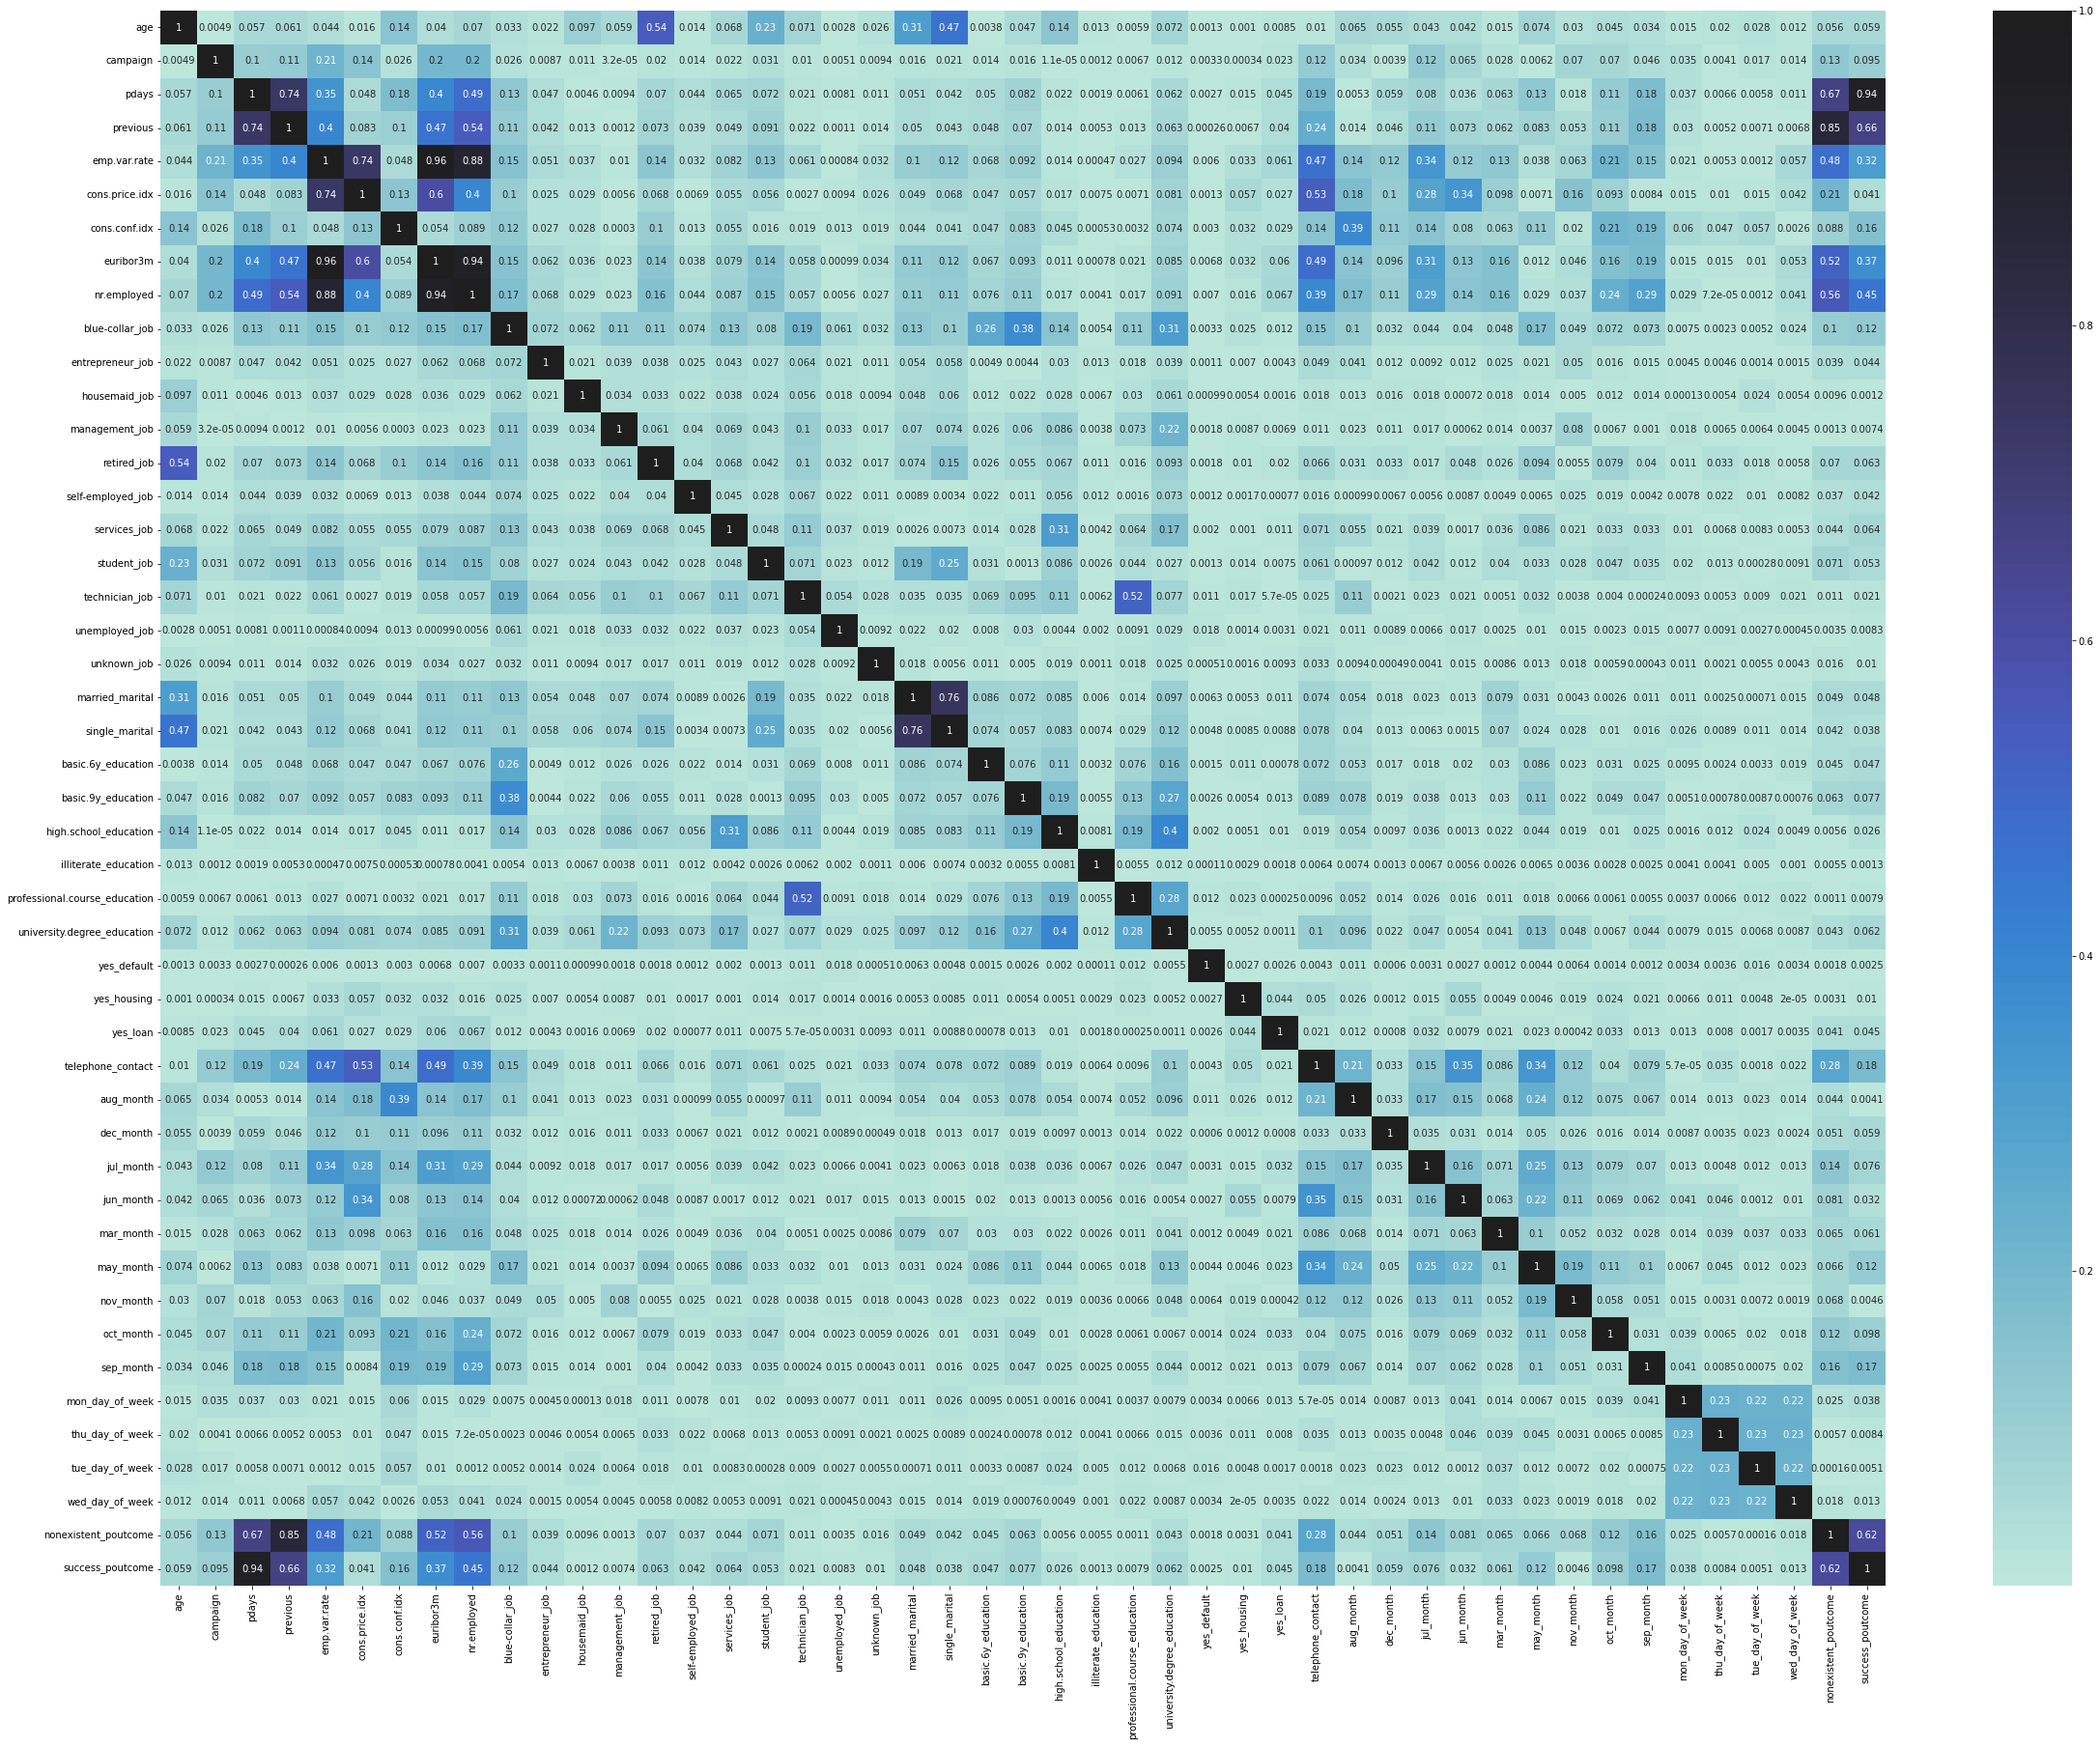

In [122]:
plt.figure(figsize=(40,30))
sns.heatmap(x_train_sm.corr().abs(),annot=True,center=1)

In [44]:
def correlation(dataset,threshold=0.7):
    corr=dataset.corr().abs()
    columns_index=[]
    for i in range(len(corr)):
        for j in range(i):
            if corr.iloc[i,j]>=threshold:
                columns_index.append(i)
    return dataset.columns[columns_index].unique()

In [124]:
corr_cols=correlation(x_train_sm,0.5)
corr_cols

Index(['previous', 'cons.price.idx', 'euribor3m', 'nr.employed', 'retired_job',
       'single_marital', 'professional.course_education', 'telephone_contact',
       'nonexistent_poutcome', 'success_poutcome'],
      dtype='object')

<AxesSubplot:>

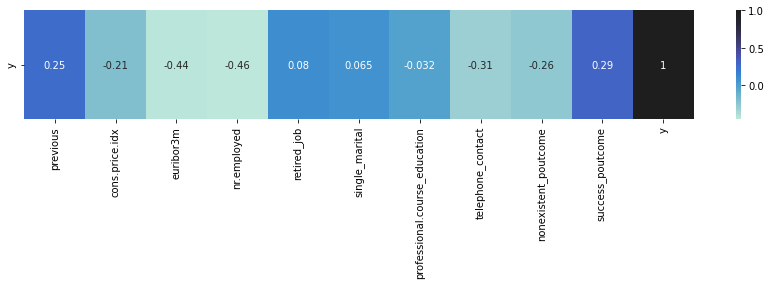

In [125]:
plt.figure(figsize=(15,2))
sns.heatmap(pd.concat([x_train_sm[corr_cols],y_train_sm],axis=1).corr()[-1:],annot=True,center=1)

<AxesSubplot:>

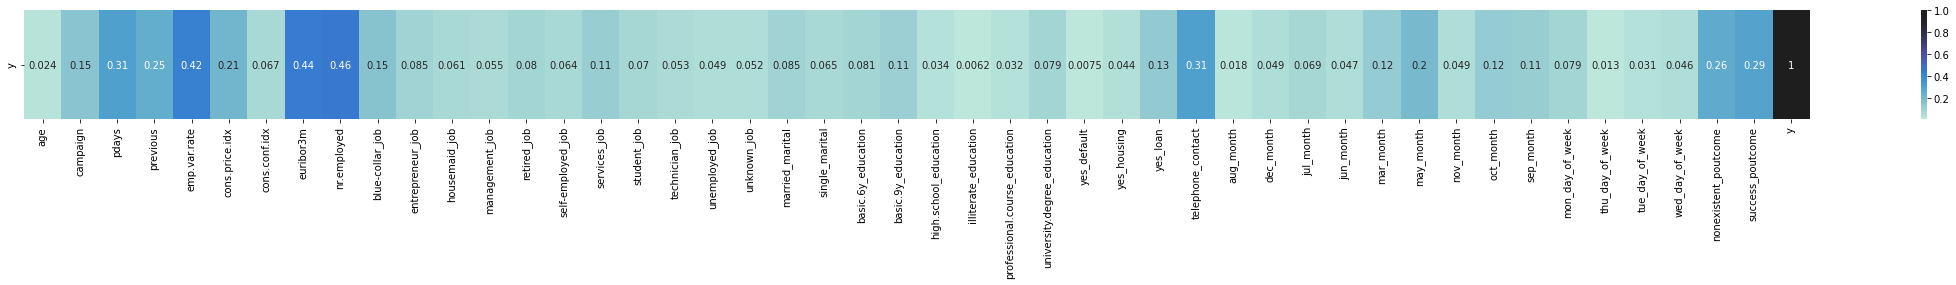

In [127]:
plt.figure(figsize=(40,2))
sns.heatmap(pd.concat([x_train_sm,y_train_sm],axis=1).corr().abs()[-1:],annot=True,center=1)

## II.3 Mutual_info :

In [128]:
from sklearn.feature_selection import mutual_info_classif

In [129]:
mutual_info_classif(x_train_sm[corr_cols],y_train_sm)

array([0.06609841, 0.17022324, 0.36624684, 0.15491618, 0.00834484,
       0.00102468, 0.        , 0.04895228, 0.0378867 , 0.0501105 ])

## II.4 Chi2 (f_score,p_value):

In [49]:
from sklearn.feature_selection import chi2

In [131]:
res=chi2(x_train_sm[corr_cols],y_train_sm)
f_scores=res[0]
p_values=res[1]
print('columns :',corr_cols.values)
print('\nf_scores :',f_scores)
print('\np_values :',p_values)

columns : ['previous' 'cons.price.idx' 'euribor3m' 'nr.employed' 'retired_job'
 'single_marital' 'professional.course_education' 'telephone_contact'
 'nonexistent_poutcome' 'success_poutcome']

f_scores : [ 737.36356935  296.54406983 3771.0974651  1880.60178301  343.08924655
  167.65336604   50.34936013 3973.16959811  888.6628875  4197.91865439]

p_values : [2.24412768e-162 1.86516167e-066 0.00000000e+000 0.00000000e+000
 1.35549050e-076 2.40832535e-038 1.28672049e-012 0.00000000e+000
 2.86015813e-195 0.00000000e+000]


In [137]:
from sklearn.feature_selection import SelectKBest

In [141]:
Skb=SelectKBest(score_func=chi2,k=10)
res=Skb.fit_transform(x_train_sm,y_train_sm)

In [145]:
best_f=x_train_sm.columns[Skb.get_support()]

## II.5.Resume:

In [151]:
best_features=corr_cols
best_x_train=x_train_sm[best_features]
y_train=y_train_sm
best_x_train.shape,y_train.shape

((56443, 10), (56443,))

In [152]:
best_x_test=x_test_sm[best_features]
y_test=y_test_sm

# III. Training:

In [52]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [154]:
rfc=RandomForestClassifier()
cross_val_score(rfc,best_x_train,y_train,cv=4)

array([0.87151867, 0.8631564 , 0.86854227, 0.86420978])

In [155]:
rfc=RandomForestClassifier()
rfc.fit(best_x_train,y_train)
rfc.score(best_x_train,y_train)

0.8976312385946884

In [136]:
knn=KNeighborsClassifier()
cross_val_score(knn,best_x_train,y_train,cv=4)

array([0.84373893, 0.83806959, 0.8467862 , 0.83671155])

In [156]:
dtc=DecisionTreeClassifier()
cross_val_score(dtc,best_x_train,y_train,cv=4)

array([0.87258167, 0.8646446 , 0.86946354, 0.86498937])

In [157]:
sgdc=SGDClassifier()
cross_val_score(sgdc,best_x_train,y_train,cv=4)

array([0.71639147, 0.71284813, 0.71157253, 0.71275691])

In [158]:
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
cross_val_score(ada,best_x_train,y_train,cv=4)

array([0.87917228, 0.86918007, 0.87619588, 0.87158044])

# III. Hyperparameter Tuning:

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report

## III.1 RandomForestClassifier:

In [159]:
rfc_params={
    'n_estimators':np.arange(60,120,5)
}
rsv_rfc=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=rfc_params,verbose=0)
rsv_rfc.fit(best_x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115])})

In [160]:
rsv_rfc.best_estimator_

RandomForestClassifier(n_estimators=115)

In [161]:
rsv_rfc.best_score_

0.8673705985248461

In [162]:
rsv_rfc.score(best_x_test,y_test)

0.8730068740698745

In [163]:
y_pred=rsv_rfc.best_estimator_.predict(best_x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6899
           1       0.93      0.81      0.87      7212

    accuracy                           0.87     14111
   macro avg       0.88      0.87      0.87     14111
weighted avg       0.88      0.87      0.87     14111



In [ ]:
import pickle
pickle.dump(rsv_rfc.best_estimator_,open('random_forest_classifier.pkl','wb'))

## III.2 KNN:

In [164]:
KNN_params={'n_neighbors':np.arange(5,50,1)}
knn_rsv=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=KNN_params,n_iter=100,n_jobs=4,cv=4,verbose=0)
knn_rsv.fit(best_x_train,y_train)

RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [165]:
knn_rsv.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [166]:
knn_rsv.best_score_

0.84490546653467

In [170]:
knn_rsv.score(best_x_test,y_test)

0.849904329955354

In [171]:
dt_params= {"max_depth": [3, None],
              "min_samples_leaf": np.arange(1,9,1),
              "criterion": ["gini", "entropy"]}
dt_rsv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=dt_params,verbose=0)
dt_rsv.fit(best_x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [172]:
dt_rsv.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)

In [173]:
dt_rsv.best_score_

0.868628504105682

In [174]:
y_pred=dt_rsv.best_estimator_.predict(best_x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      6899
           1       0.93      0.81      0.87      7212

    accuracy                           0.87     14111
   macro avg       0.88      0.87      0.87     14111
weighted avg       0.88      0.87      0.87     14111



In [177]:
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
cross_val_score(ada,best_x_train,y_train,cv=4)

array([0.87867621, 0.86854227, 0.87555808, 0.87108434])

In [179]:
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada.fit(best_x_train,y_train)
y_pred=ada.predict(best_x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     27596
           1       0.96      0.83      0.89     28847

    accuracy                           0.90     56443
   macro avg       0.90      0.90      0.90     56443
weighted avg       0.91      0.90      0.90     56443



In [180]:
y_pred=ada.predict(best_x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6899
           1       0.93      0.82      0.87      7212

    accuracy                           0.88     14111
   macro avg       0.88      0.88      0.88     14111
weighted avg       0.88      0.88      0.88     14111



# IV.VOTING:

In [96]:
from sklearn.ensemble import VotingClassifier

In [184]:
estimators={('rfc',RandomForestClassifier(n_estimators=100)),
            ('dt',DecisionTreeClassifier()),
            ('ada',AdaBoostClassifier())
           }
VC=VotingClassifier(estimators=estimators,voting='soft')
VC.fit(best_x_train,y_train)

VotingClassifier(estimators={('ada', AdaBoostClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('rfc', RandomForestClassifier())},
                 voting='soft')

In [185]:
y_pred=VC.predict(best_x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6899
           1       0.93      0.81      0.87      7212

    accuracy                           0.87     14111
   macro avg       0.88      0.88      0.87     14111
weighted avg       0.88      0.87      0.87     14111



<AxesSubplot:>

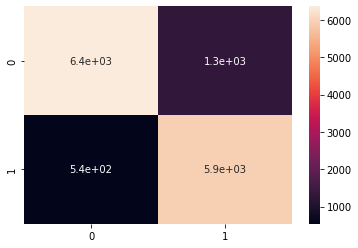

In [183]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

# V.Artificial Neural Network:

In [187]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [197]:
ann=Sequential([
    Dense(32,activation='relu',input_shape=(10,)),
    Dense(64,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
    
])
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(best_x_train.values,y_train,validation_split=0.2,epochs=100,batch_size=20,verbose=2)

Epoch 1/100
2258/2258 - 6s - loss: 0.5589 - accuracy: 0.7220 - val_loss: 0.5482 - val_accuracy: 0.7307
Epoch 2/100
2258/2258 - 6s - loss: 0.5500 - accuracy: 0.7270 - val_loss: 0.5472 - val_accuracy: 0.7281
Epoch 3/100
2258/2258 - 6s - loss: 0.5455 - accuracy: 0.7285 - val_loss: 0.5378 - val_accuracy: 0.7306
Epoch 4/100
2258/2258 - 6s - loss: 0.5414 - accuracy: 0.7295 - val_loss: 0.5359 - val_accuracy: 0.7327
Epoch 5/100
2258/2258 - 5s - loss: 0.5389 - accuracy: 0.7310 - val_loss: 0.5407 - val_accuracy: 0.7331
Epoch 6/100
2258/2258 - 6s - loss: 0.5355 - accuracy: 0.7331 - val_loss: 0.5381 - val_accuracy: 0.7325
Epoch 7/100
2258/2258 - 6s - loss: 0.5338 - accuracy: 0.7330 - val_loss: 0.5320 - val_accuracy: 0.7351
Epoch 8/100
2258/2258 - 6s - loss: 0.5317 - accuracy: 0.7344 - val_loss: 0.5359 - val_accuracy: 0.7327
Epoch 9/100
2258/2258 - 6s - loss: 0.5297 - accuracy: 0.7338 - val_loss: 0.5330 - val_accuracy: 0.7340
Epoch 10/100
2258/2258 - 5s - loss: 0.5276 - accuracy: 0.7358 - val_loss:

# VI.Conclusion:
best model is adaBoostClassifier.